<a href="https://colab.research.google.com/github/divya-tiwari-13/car-prize-pridiction/blob/main/edureka_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

# Load data from CSV file (replace 'used_cars.csv' with your actual filename)
data = pd.read_csv('/content/cars.csv')


In [ ]:
data.isnull().sum()


Id                         0
year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

In [ ]:
# Check the actual column names in your DataFrame
print(data.columns)

# Assuming the correct column name is 'distance_travelled', use:
data['distance_travelled(kms)'].fillna(data['distance_travelled(kms)'].median(), inplace=True)

Index(['Id', 'year', 'brand', 'full_model_name', 'model_name', 'price',
       'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank',
       'car_age'],
      dtype='object')


In [ ]:
data.dtypes


Id                           int64
year                         int64
brand                       object
full_model_name             object
model_name                  object
price                      float64
distance_travelled(kms)    float64
fuel_type                   object
city                        object
brand_rank                   int64
car_age                    float64
dtype: object

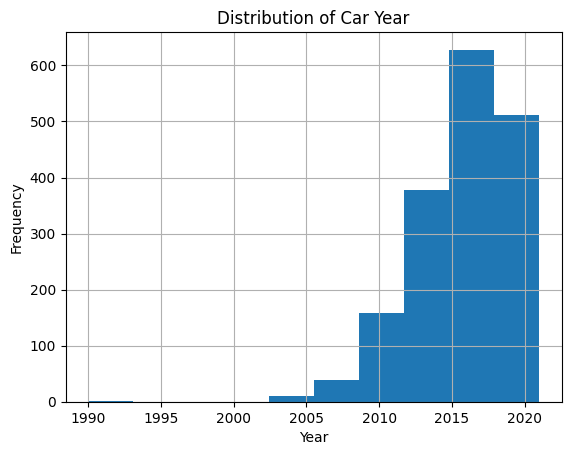

In [ ]:
import matplotlib.pyplot as plt

data['year'].hist()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Car Year')
plt.show()

# Create boxplots for continuous features (e.g., distance_travelled)


                               Id      year     price  \
Id                       1.000000 -0.054391 -0.105696   
year                    -0.054391  1.000000  0.288483   
price                   -0.105696  0.288483  1.000000   
distance_travelled(kms)  0.100282 -0.386107 -0.137351   
brand_rank               0.022191  0.134275 -0.164591   
car_age                  0.054391 -1.000000 -0.288483   

                         distance_travelled(kms)  brand_rank   car_age  
Id                                      0.100282    0.022191  0.054391  
year                                   -0.386107    0.134275 -1.000000  
price                                  -0.137351   -0.164591 -0.288483  
distance_travelled(kms)                 1.000000   -0.111406  0.386107  
brand_rank                             -0.111406    1.000000 -0.134275  
car_age                                 0.386107   -0.134275  1.000000  


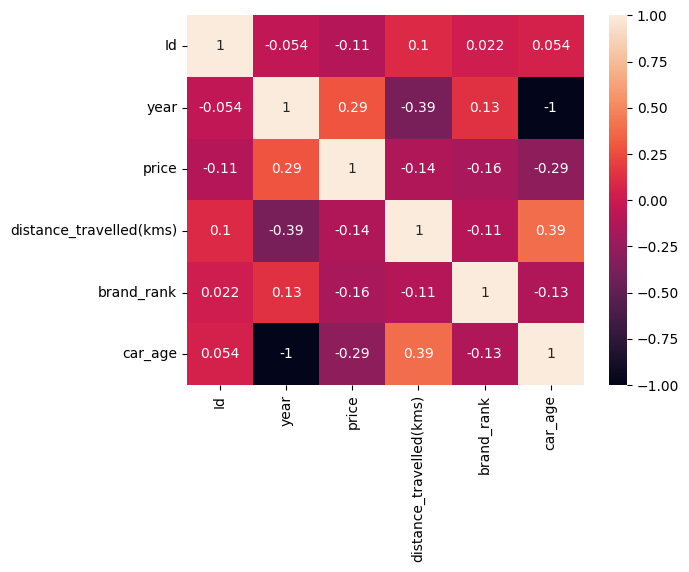

In [ ]:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calculate correlation on numerical data
correlation = numerical_data.corr()
print(correlation)

# Heatmap for visualizing correlations
import seaborn as sns

sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
data['car_age'] = 2024 - data['year']  # Assuming current year is 2024


In [ ]:
# Label encoding for brands, model_names (if needed)
le = LabelEncoder()
data['brand_encoded'] = le.fit_transform(data['brand'])

# One-hot encoding for fuel_type, city (if many categories)
ohe = OneHotEncoder(sparse=False)
fuel_type_encoded = ohe.fit_transform(data[['fuel_type']])
data = pd.concat([data, pd.DataFrame(fuel_type_encoded, columns=['fuel_type_encoded_' + str(x) for x in ohe.categories_[0]])], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['car_age', 'distance_travelled(kms)']])
data[['car_age_scaled', 'distance_travelled_scaled']] = pd.DataFrame(data_scaled, columns=['car_age_scaled', 'distance_travelled_scaled'])


In [ ]:
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Label encoding for brands, model_names (if needed)
le = LabelEncoder()
data['brand_encoded'] = le.fit_transform(data['brand'])
data['model_encoded'] = le.fit_transform(data['model_name']) # Assuming 'model_name' is another categorical column

# One-hot encoding for fuel_type, city (if many categories)
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore') # Handle potentially unseen categories in test data
fuel_type_encoded = ohe.fit_transform(data[['fuel_type']])
data = pd.concat([data, pd.DataFrame(fuel_type_encoded, columns=['fuel_type_encoded_' + str(x) for x in ohe.categories_[0]])], axis=1)

# ... (rest of your preprocessing steps)

# Drop original categorical columns and the 'Id' column before model fitting
X = data.drop(['price', 'brand', 'model_name', 'fuel_type', 'Id'], axis=1)  # Features
y = data['price']  # Target variable

# ... (rest of your model training code)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
def preprocess_new_car(new_car_data):
    # Apply the same preprocessing steps you used on your training data
    # For example:
    new_car_data['brand_encoded'] = le.transform(new_car_data['brand'])
    new_car_data['model_encoded'] = le.transform(new_car_data['model_name'])
    # Handle unseen labels, for example by assigning a default value
    # Use a try-except block to handle unseen labels
    try:
        new_car_data['brand_encoded'] = le.transform(new_car_data['brand'])
    except ValueError:
        new_car_data['brand_encoded'] = -1 # Or any other default value

    try:
        new_car_data['model_encoded'] = le.transform(new_car_data['model_name'])
    except ValueError:
        new_car_data['model_encoded'] = -1 # Or any other default value
    # ... (rest of your preprocessing steps)
    return new_car_data